# Excercise: Skill Pay Analysis

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Filter location and drop Nan values

In [4]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short']=="Data Analyst")&(df['job_country']=="United States")].copy()
# Drop NaN Values from the 'salary_year_avg' column for plotting
df_DA_US = df_DA_US.dropna(subset= ['salary_year_avg'])

df_DA_US.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.00,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.00,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.00,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.00,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.00,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
1587,Data Analyst,Sr Data Analyst,"Long Beach, CA",via Indeed,Full-time,False,"California, United States",2023-02-16 13:00:47,False,True,United States,year,89111.75,NaN,Molina Healthcare,[excel],{'analyst_tools': ['excel']}
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.00,NaN,Western Digital,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
1684,Data Analyst,Data Analyst - Data17829,"Tampa, FL",via Indeed,Full-time,False,"Florida, United States",2023-07-18 13:02:09,True,True,United States,year,120000.00,NaN,Acrisure,"[shell, sql, azure, databricks, linux]","{'cloud': ['azure', 'databricks'], 'os': ['lin..."
1867,Data Analyst,Data Integration Analyst (West Coast/Chicago),"Chicago, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-18 13:01:47,False,False,United States,year,101500.00,NaN,Forsta,"[php, python, express]","{'programming': ['php', 'python'], 'webframewo..."
2401,Data Analyst,Data Analytics- Auto Intern,"Dublin, CA",via LinkedIn,Internship,False,"California, United States",2023-12-27 13:01:14,False,False,United States,year,35000.00,NaN,Epicor,[go],{'programming': ['go']}


2. Explode the "job_skills" column

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


3. Aggregate 2 new df based on the salary and the count of each skill

In [27]:
df_DA_US_pivot = df_DA_US.groupby( by ='job_skills').agg(
    count = ('job_skills','size'),
    median = ('salary_year_avg','median')

)
df_DA_US_top_pay = df_DA_US_pivot.sort_values(by='median', ascending=False).head(10)

df_DA_US_skills = df_DA_US_pivot.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

df_DA_US_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


4. Create a plot containing 2 subplots for each of the dataframe

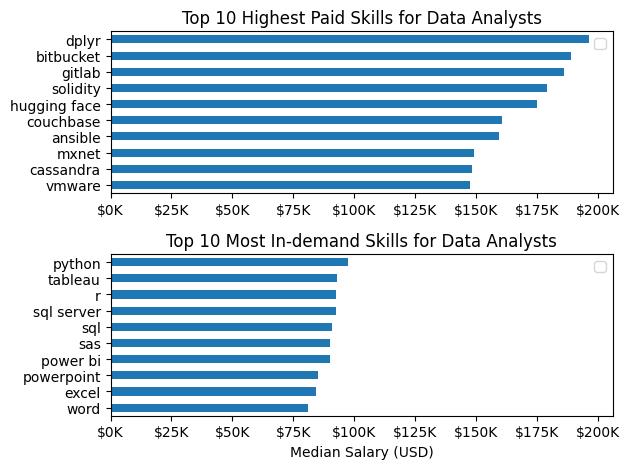

In [37]:
fig, ax = plt.subplots(2,1)

df_DA_US_top_pay.plot(
    kind = "barh",
    y= 'median',
    ax = ax[0]
)
ax[0].invert_yaxis() 
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')

#--> instead of using invert_yaxis, we can do [::-1]
df_DA_US_skills[::-1].plot(
    kind = "barh",
    y= 'median',
    ax = ax[1]
)

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f'${int(x/1000)}K'))
ax[1].legend('')


fig.tight_layout()